### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to **build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance**. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#Imporing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Adding the data
df = pd.read_csv('Leads.csv')

In [3]:
#checking first few rows
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# basic information about the data and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# data statistical description
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking % of missing values for each column
round(df.isnull().sum() * 100 / len(df),1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   15.6
How did you hear about X Education               23.9
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [7]:
# removing the column Prospect ID
df = df.drop('Prospect ID', axis=1)

# removing the columns which have almost 30% records missing and they don't add any value to the model
drop_cols = ['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score',
             'Asymmetrique Profile Index','Magazine','How did you hear about X Education',
             'Receive More Updates About Our Courses','Update me on Supply Chain Content',
             'Get updates on DM Content','I agree to pay the amount through cheque']

df = df.drop(drop_cols, axis=1)

In [8]:
df.shape

(9240, 24)

#### EDA

In [9]:
#selcting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

#selcting numerical columns
num_cols = df.select_dtypes(include=['int','float']).columns

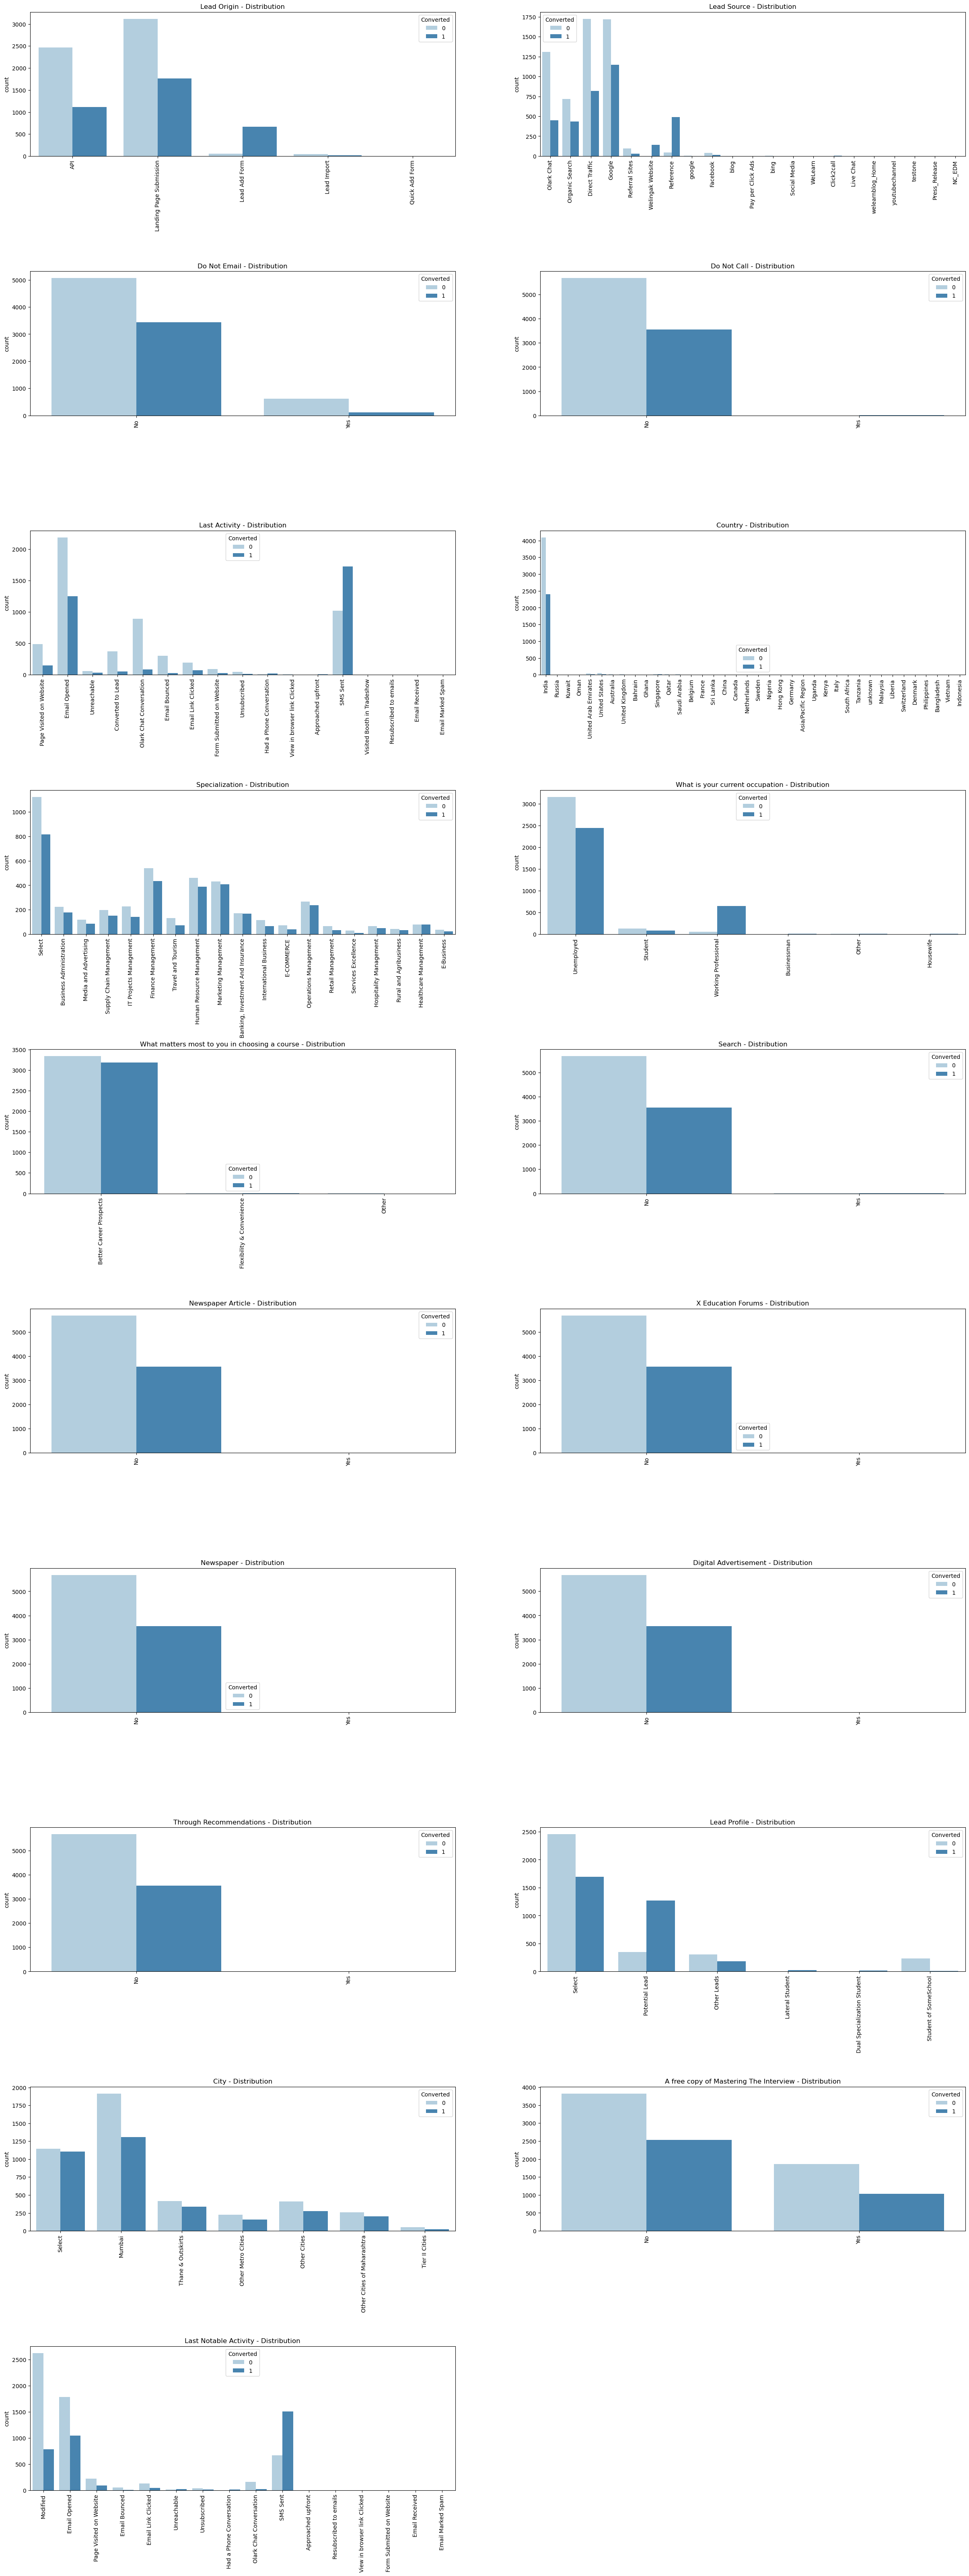

In [10]:
# Plot of categorical features

fig = plt.figure(figsize=(30,80))
for i in range(len(cat_cols)):
  col=cat_cols[i]
  sub=fig.add_subplot(10,2,i+1)
  chart = sns.countplot(data=df,x=col,hue='Converted',palette='Blues')
  plt.title(col+' - Distribution')
  plt.xticks(rotation=90)
  plt.xlabel(None)
  plt.subplots_adjust(hspace = 0.8)

In [11]:
# replacing values counts <100 with 'others' to reduce dimentionality later
for col in cat_cols:

    counts = df[col].value_counts()

    categories_to_replace = counts[counts < 100].index

    df[col] = df[col].apply(lambda x: 'Others' if x in categories_to_replace else x)

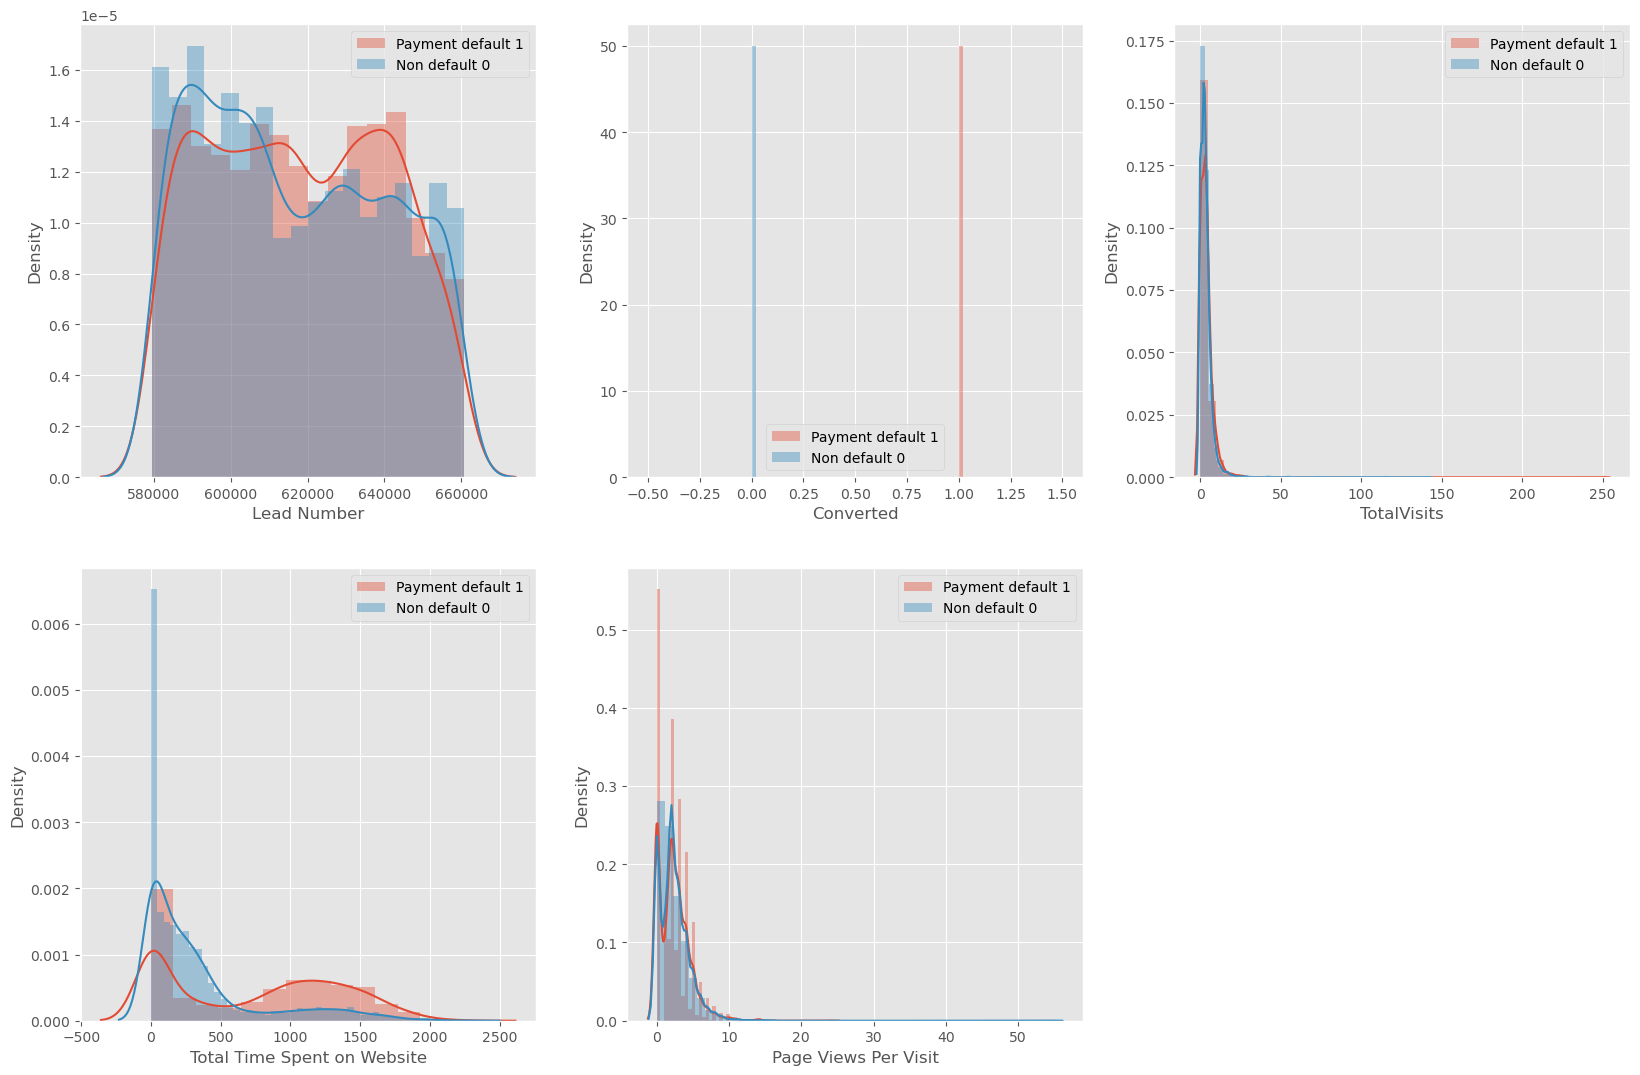

In [12]:
# Visualizing Graph for distribution of numerical features
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,20))
for i in range(len(num_cols)):
  col=num_cols[i]
  sub=fig.add_subplot(3,3,i+1)
  ax = sns.distplot(df[df.columns].loc[df['Converted'] == 1, col],label='Payment default 1')
  ax = sns.distplot(df[df.columns].loc[df['Converted'] == 0, col],label='Non default 0')
  plt.legend()

In [13]:
# Dropping both the location fields
df = df.drop(['Country','City'],axis=1)

In [14]:
#dropping feature
df = df.drop('What matters most to you in choosing a course',axis=1)

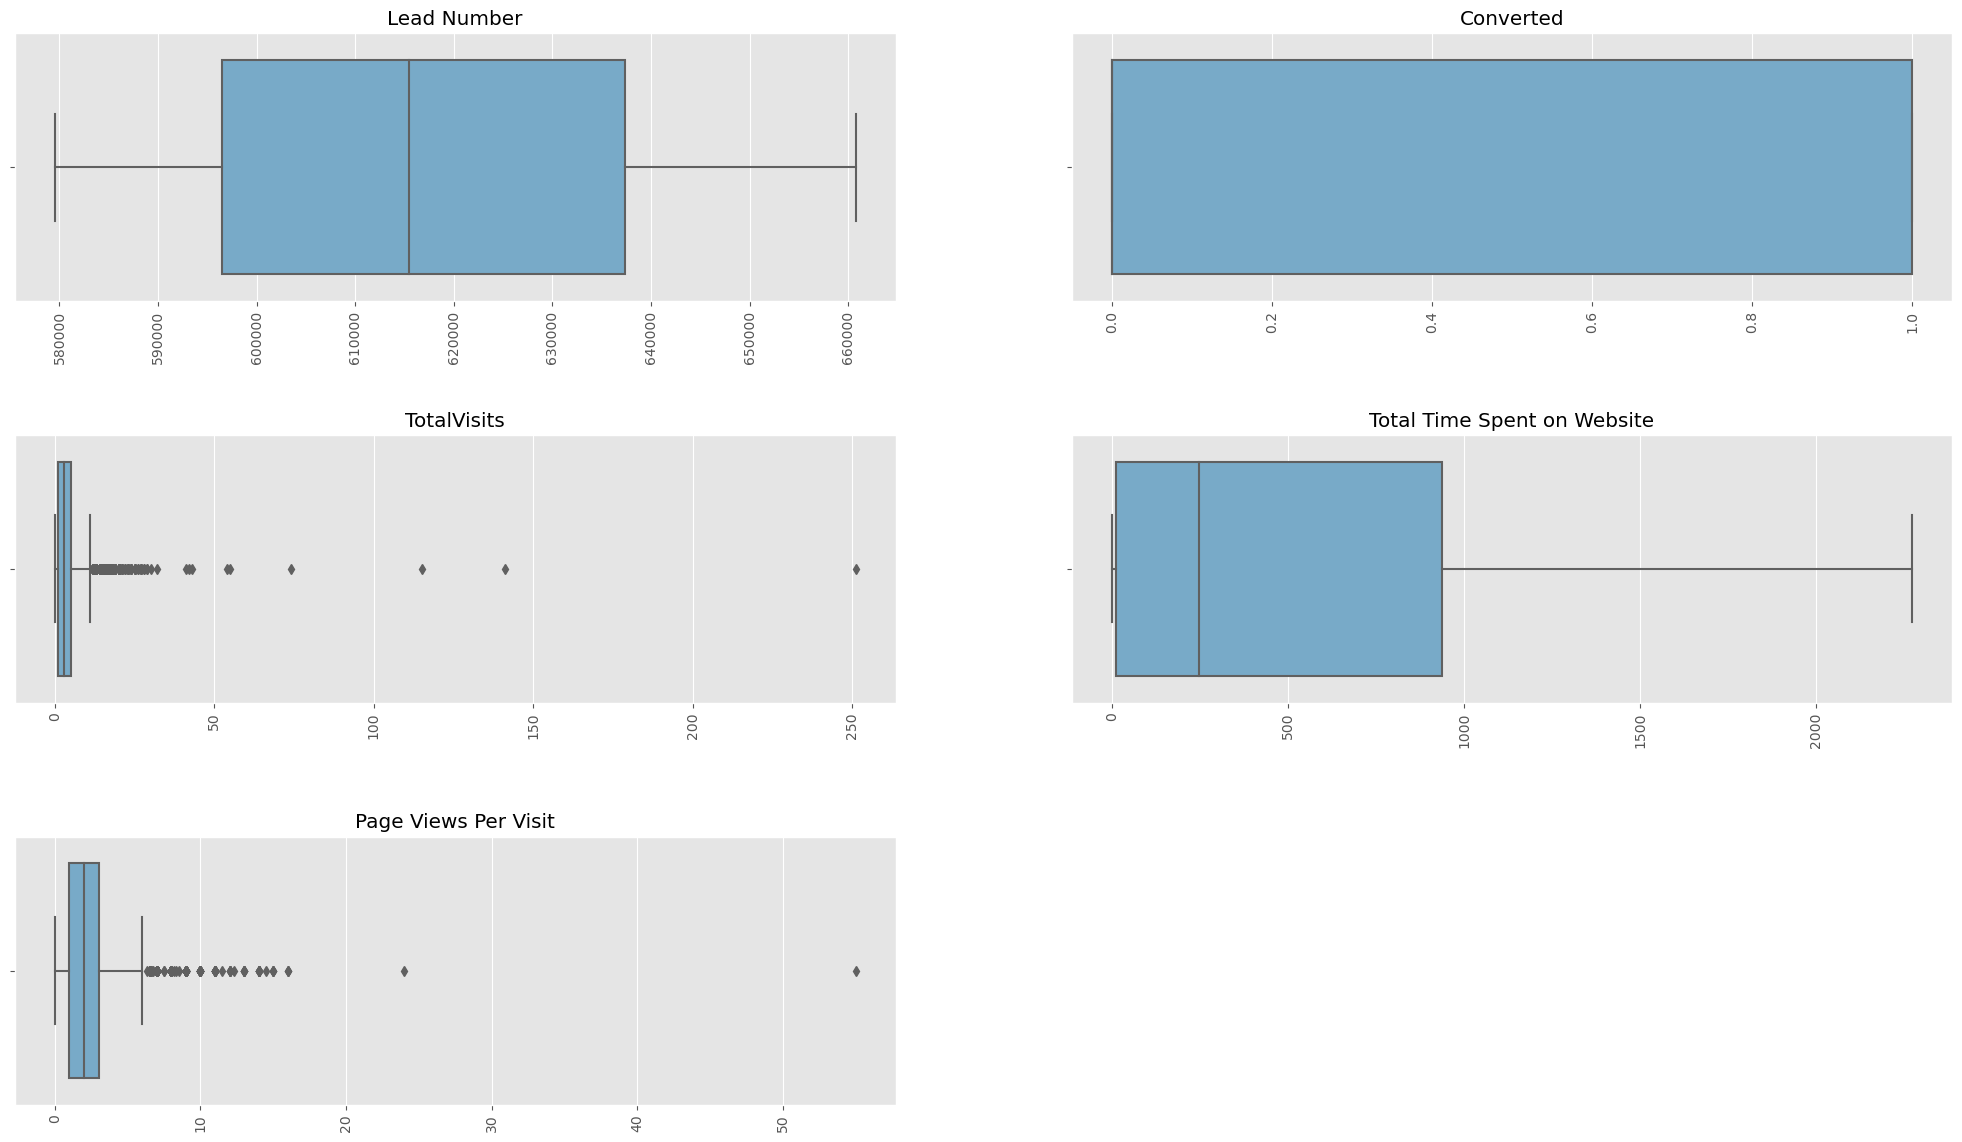

In [15]:
# Boxplot for numerical features
fig = plt.figure(figsize=(25,40))
for i in range(len(num_cols)):
  col=num_cols[i]
  sub=fig.add_subplot(8,2,i+1)
  chart = sns.boxplot(data=df,x=col,hue='Converted',palette='Blues')
  plt.title(col)
  plt.xticks(rotation=90)
  plt.xlabel(None)
  plt.subplots_adjust(hspace = .5)

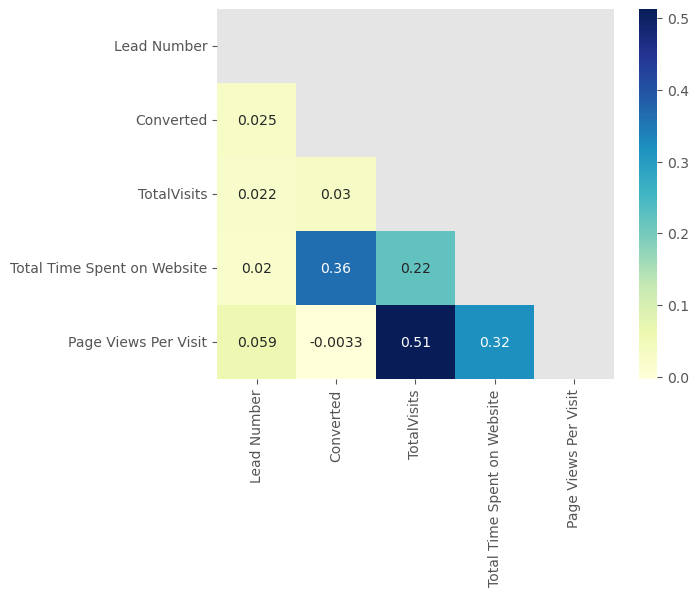

In [16]:
# Checking coorelation matrix
mask = np.triu(np.ones_like(df.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [17]:
#filling missing values with mode in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    m = df[col].mode()[0]
    df[col].fillna(value=m, inplace=True)

In [18]:
#filling missing values with mode in categorical columns
for col in df.select_dtypes(include=['int','float']).columns:
    m = df[col].median()
    df[col].fillna(value=m, inplace=True)

In [19]:
df.isna().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Lead Profile                              0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [20]:
# Creating dummy variable for categorical data
new_df = pd.get_dummies(df, columns = df.select_dtypes(include=['object']).columns, drop_first=True)

In [21]:
#splitting dataset
X = new_df.drop('Converted',axis=1)
y = new_df['Converted']

In [22]:
#feature selection using selectkbest and chi2
from sklearn.feature_selection import SelectKBest, chi2
selector  = SelectKBest(chi2, k=20)
selector.fit_transform(X, y)

array([[6.60737e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [6.60728e+05, 6.74000e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.60727e+05, 1.53200e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.79545e+05, 1.99000e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.79538e+05, 4.99000e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.79533e+05, 1.27900e+03, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [23]:
#new dataframe with top 30 features
X_selected = selector.transform(X)
X = pd.DataFrame(X_selected, columns = X.columns[selector.get_support()])

In [24]:
# Split 80:20 into Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=42)

In [25]:
print('Dataset shape : ', len(y_train))

Dataset shape :  6468


61.45640015602112
38.54359984397888


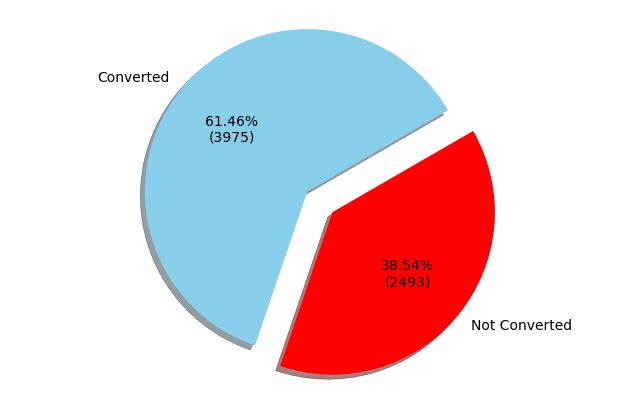

In [26]:
# Plot of majority and minority class
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
labels = 'Converted','Not Converted'
total =len(y_train)
my_colors = ['skyblue','red']
my_explode = (0,0.2)
plt.figure(figsize=(8,5))
plt.pie(y_train.value_counts(), labels=labels ,autopct=my_fmt, startangle=30 , shadow =True, colors = my_colors, explode=my_explode )
plt.axis('equal')
plt.show()

In [27]:
# Scale the numerical data to remove disparities in magnitude and scales of numerical variables
num_vars= X_train.select_dtypes(include=['int','float']).columns

scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Others,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1755,1.061669,-0.528672,-0.293507,-0.481907,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,-0.646374,-0.758456,0.341632,-0.291638,-0.065938,-0.464531,0.594254,-0.163299,-0.764537,-0.550914
8085,-1.252674,-0.891534,3.407079,-0.481907,3.963985,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,1.547092,-0.758456,0.341632,-0.291638,-0.065938,2.152707,-1.682781,-0.163299,1.307981,-0.550914
426,1.637100,1.122535,-0.293507,-0.481907,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,1.547092,1.318468,0.341632,-0.291638,-0.065938,-0.464531,0.594254,-0.163299,1.307981,-0.550914
1214,1.263910,1.639339,-0.293507,-0.481907,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,-0.646374,-0.758456,-2.927123,3.428906,-0.065938,2.152707,-1.682781,-0.163299,-0.764537,-0.550914
2714,0.692955,1.828101,-0.293507,-0.481907,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,1.547092,-0.758456,0.341632,-0.291638,-0.065938,-0.464531,0.594254,-0.163299,-0.764537,1.815164


### Model Building And Testing

In [28]:
#Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [29]:
LR = LogisticRegression(C=0.01,class_weight='balanced',solver='liblinear',random_state=42)
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [30]:
#scaling test data
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Others,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8305,-1.320031,-0.891534,-0.293507,2.075088,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,-0.646374,1.318468,0.341632,-0.291638,-0.065938,-0.464531,0.594254,-0.163299,-0.764537,-0.550914
1591,1.124635,1.067556,-0.293507,-0.481907,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,-0.646374,-0.758456,0.341632,-0.291638,-0.065938,-0.464531,0.594254,-0.163299,-0.764537,-0.550914
8604,-1.420256,-0.589149,-0.293507,-0.481907,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,1.547092,-0.758456,0.341632,-0.291638,-0.065938,-0.464531,0.594254,-0.163299,-0.764537,1.815164
1333,1.211858,-0.028362,-0.293507,-0.481907,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,-0.646374,1.318468,0.341632,-0.291638,-0.065938,-0.464531,0.594254,-0.163299,1.307981,-0.550914
4260,0.071397,-0.887869,-0.293507,-0.481907,-0.252271,-0.125949,-0.298757,-0.19588,-0.337668,-0.274755,-0.646374,-0.758456,0.341632,-0.291638,-0.065938,-0.464531,0.594254,-0.163299,1.307981,-0.550914


In [31]:
#class prediction of y
y_pred = LR.predict(X_test)
y_train_pred = LR.predict(X_train)

In [32]:
# getting all scores for Classifier
train_accuracy = round(accuracy_score(y_train_pred,y_train), 3)
test_accuracy = round(accuracy_score(y_pred,y_test), 3)
precision_score = round(precision_score(y_pred,y_test), 3)
recall_score = round(recall_score(y_pred,y_test), 3)
f1_score = round(f1_score(y_pred,y_test), 3)
roc_score = round(roc_auc_score(y_pred,y_test), 3)

print("Accuracy on train data : ", train_accuracy)
print("Accuracy on test data : ", test_accuracy)
print("Precision on test data : ", precision_score)
print("Recall on test data : ", f1_score)
print("ROC score on test data : ", roc_score)

Accuracy on train data :  0.831
Accuracy on test data :  0.828
Precision on test data :  0.816
Recall on test data :  0.785
ROC score on test data :  0.818


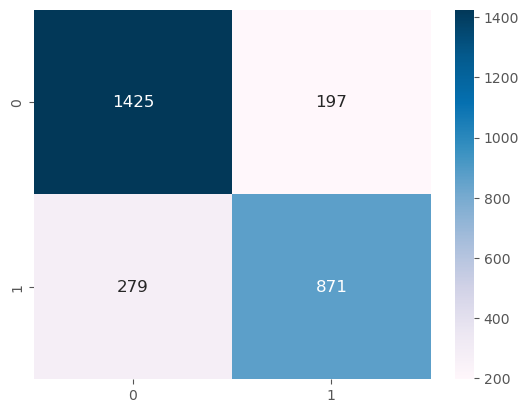

In [33]:
#confusion matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws= {'size':12})
plt.show()

In [34]:
coef = LR.coef_[0]
features = X.columns

# Calculate absolute value of coefficients
abs_coef = np.abs(coef)

# Normalize coefficients

norm_coef = (abs_coef / np.sum(abs_coef))

# Sort features by importance
sorted_idx = np.argsort(norm_coef)[::-1]
sorted_features = features[sorted_idx]
sorted_norm_coef = norm_coef[sorted_idx]

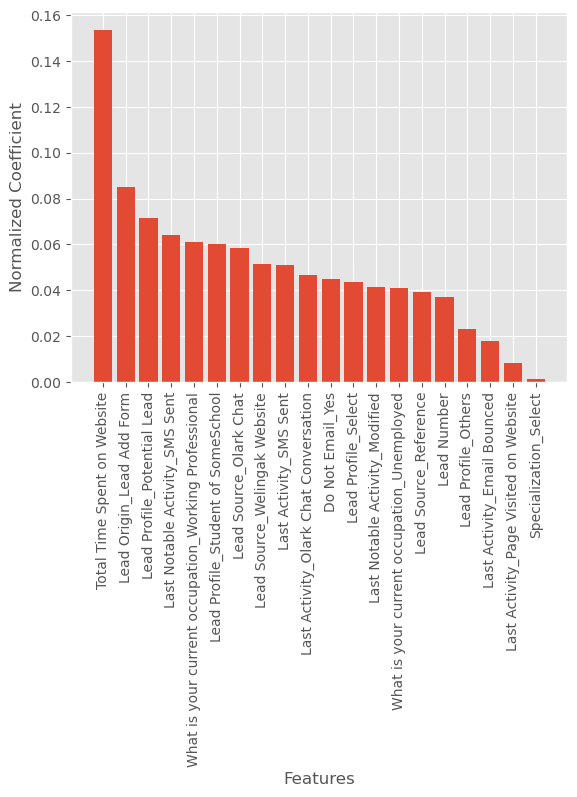

In [38]:
# Plot feature importance
plt.bar(sorted_features, sorted_norm_coef)
plt.xticks(rotation=90)
plt.ylabel("Normalized Coefficient")
plt.xlabel("Features")
plt.show()